In [4]:
# coding: utf-8

In [ ]:
"""
https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a
⑦可視化
ここではpandsの標準plot機能をつかって簡単に書いちゃう。
(ただしライブラリとしてmatplotlibは使用する)
#まだ　⑧変数の前処理
#まだ　さすがにめんどいのでそのまま
"""

In [ ]:
"""
df.plot() #グラフ作成　matplotlibもう少し複雑にしたいような気もする
df.corr()　#相関係数(行列)を出す。
df.pivot() #Pivot Table エクセルより数倍楽ですごい使えるので練習したい。少しcodingが複雑。
"""

In [ ]:
# ToDO
#  datetimeをindexに置き換える。
#  datetimeのdtypeを確認。必要であればdtypeをdatetimeに変更する。

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('lunch_box_5.csv')

In [7]:
df.set_index('datetime', inplace=True)
df.head()

,Unnamed: 0,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,days,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,,
2014-01-09,30,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-10,31,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000,-0.532110
2014-01-14,32,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667,0.137255
2014-01-15,33,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-01-16,34,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333,1.413793


In [8]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df.index

DatetimeIndex(['2014-01-09', '2014-01-10', '2014-01-14', '2014-01-15',
               '2014-01-16', '2014-01-17', '2014-01-20', '2014-01-21',
               '2014-01-22', '2014-01-23',
               ...
               '2014-09-11', '2014-09-16', '2014-09-17', '2014-09-18',
               '2014-09-19', '2014-09-22', '2014-09-24', '2014-09-25',
               '2014-09-29', '2014-09-30'],
              dtype='datetime64[ns]', name='datetime', length=164, freq=None)

In [9]:
# matplotlibのインポート（jupyter notebook内でmatplotlibの図を描写するときのおまじない的）
# Labでは不要　#%matplotlib inlines　#% matplotlib inline」は、Jupyter Notebookで、ノートブック上にグラフを描画する際に指定する記述です。
import matplotlib.pyplot as plt

#おまじない 詳細はhttps://qiita.com/eriksoon/items/b93030ba4dc686ecfbba
plt.style.use('ggplot')

In [ ]:
"""
#日本語フォントの設定　フォントを落としてないので意味なし
from matplotlib.font_manager import FontProperties
font_path = ''  #DLしたフォントのパスを指定
font_prop = FontProperties(fname=font_path)
"""

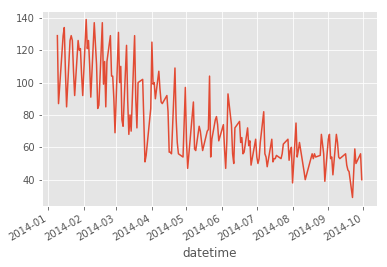

In [10]:
#超簡単な折れ線グラフ
df['sales'].plot()

Text(0.5,1,'glaph about temperature changes')

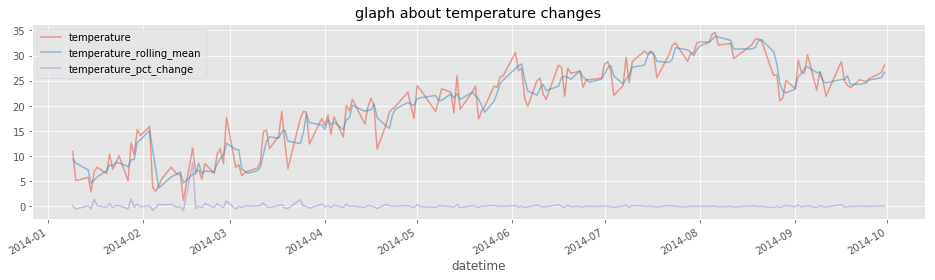

In [14]:
#少しだけ情報量の多い折れ線グラフ
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'], figsize=(16,4), alpha=0.5) #xがindexである場合は明記しなくてOK
#plt.title('気温変化に関する図')　日本語フォントをimportしていない
plt.title('glaph about temperature changes')
# alpha=0.5ってなんだっけ感

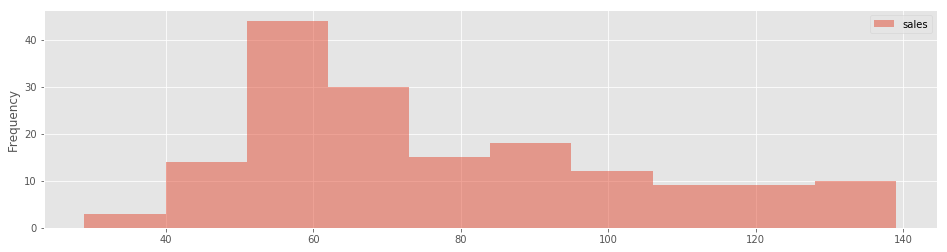

In [17]:
#ヒストグラム
df.plot(kind='hist', y='sales', bins=10, figsize=(16,4), alpha=0.5)
#alphaは透明度かな

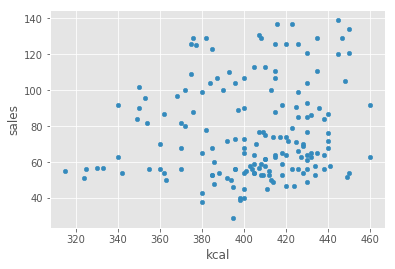

In [18]:
# 散布図
df.plot(kind='scatter', x='kcal', y='sales')

In [21]:
# 相関係数は簡単に出せる
df[['kcal', 'sales']].corr()

,kcal,sales
kcal,1.000000,0.129521
sales,0.129521,1.000000


In [27]:
# やや複雑な集計　
# 例：　月別・期間別の売り上げ個数の状況を可視化する。
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period,上旬,下旬,中旬
month,,,
1,216,1018,581
2,725,609,715
3,614,369,698
4,792,457,344
5,316,517,406
6,467,311,440
7,460,406,277
8,288,334,250
9,468,234,249


In [29]:
monthly_df

sales
month period       
1     上旬        216
      下旬       1018
      中旬        581
2     上旬        725
      下旬        609
      中旬        715
3     上旬        614
      下旬        369
      中旬        698
4     上旬        792
      下旬        457
      中旬        344
5     上旬        316
      下旬        517
      中旬        406
6     上旬        467
      下旬        311
      中旬        440
7     上旬        460
      下旬        406
      中旬        277
8     上旬        288
      下旬        334
      中旬        250
9     上旬        468
      下旬        234
      中旬        249

Text(0.5,1,'sales')

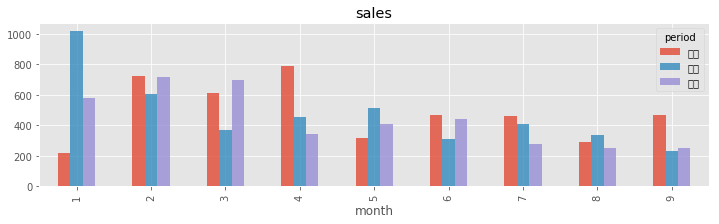

In [30]:
#棒グラフ
pivot_monthly_df.plot(kind='bar', alpha=0.8, figsize=(12,3))
plt.title('sales') #上旬・中旬・下旬は文字化け